In [2]:
# @title LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Usar la siguiente librería solo SI, se usa google colab
from google.colab import drive # da acceso a los archivos que hay en drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# PARTE I

El dataset utilizado para esta actividad se llama *"Diamond Online Marketplace 💍" by beridzeg45* en kaggle; y se puede descargar en el siguiente link: https://www.kaggle.com/datasets/beridzeg45/diamonds-prices-prediction

## Explicación de cada columna

* **Shape:** Forma geométrica del diamante.

* **Cut:** Grado de calidad del corte del diamante.

* **Color:** Grado de color del diamante de D a H.

* **Clarity:** Grado de claridad basado en imperfecciones.

* **Carat Weight:** Peso del diamante en quilates.

* **Length/Width Ratio:** Proporción entre el largo y el ancho.

* **Depth %:** Profundidad del diamante como porcentaje de su ancho.

* **Table %:** Ancho de la faceta superior como porcentaje.

* **Polish:** Calidad del acabado superficial del diamante.

* **Symmetry:** Precisión de la forma del diamante.

* **Girdle:** Grosor del borde del diamante.

* **Culet:** Tamaño de la faceta inferior.

* **Length:** Longitud del diamante en milímetros.

* **Width:** Ancho del diamante en milímetros.

* **Height:** Altura del diamante en milímetros.

* **Price:** Precio del diamante en dólares estadounidenses ($).

* **Type:** Certificación o tipo de origen del diamante.

* **Fluorescence:** Nivel de fluorescencia UV del diamante.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CUATRIMESTRES/1/ESTADISTICA APLICADA/SEMANA 2/diamonds (cleaned).csv') # agregando dataset a la variable "df"
display(df.head(5)) # Observamos las primeras 5 filas

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN


# PARTE II

In [4]:
# Separando dataset en una parte que tenga variables independientes y otra la variable dependiente.

df_indep = df.drop(columns='Price') # Dataframe con variables independientes
df_dep = df['Price'] # Dataframe con variable independiente (Price)

print("========================= Variables Independientes =========================\n")
display(df_indep.head(5))
print("\n========================= Variable Dependiente =========================\n")
display(df_dep.head(5))

========================= Variables Independientes =========================



,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,GIA,NaN



========================= Variable Dependiente =========================



,Price
0,2640
1,1070
2,1070
3,7110
4,3050


In [5]:
display(df.isnull().sum()) # Observamos la cantidad de valores nulos por columna
print(df.info()) # Información del dataset

,0
Shape,5
Cut,4303
Color,5
Clarity,5
Carat Weight,5
Length/Width Ratio,5
Depth %,7
Table %,17
Polish,20
Symmetry,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

In [6]:
"""Cambiar el valor nulo (NaN), por el promedio de los datos (variables numericas)"""

df['Carat Weight'] = df_indep['Carat Weight'].fillna(df_indep['Carat Weight'].mean())
df['Length/Width Ratio'] = df_indep['Length/Width Ratio'].fillna(df_indep['Length/Width Ratio'].mean())
df['Depth %'] = df_indep['Depth %'].fillna(df_indep['Depth %'].mean())
df['Table %'] = df_indep['Table %'].fillna(df_indep['Table %'].mean())
df['Length'] = df_indep['Length'].fillna(df_indep['Length'].mean())
df['Width'] = df_indep['Width'].fillna(df_indep['Width'].mean())
df['Height'] = df_indep['Height'].fillna(df_indep['Height'].mean())

"""Ahora verificamos que no haya valores nulos (variables numericas)"""
display(df.isnull().sum())

,0
Shape,5
Cut,4303
Color,5
Clarity,5
Carat Weight,0
Length/Width Ratio,0
Depth %,0
Table %,0
Polish,20
Symmetry,20


# PARTE III

In [7]:
"""Verificar cuantos grupos existen en las varaibles categoricas"""

for col in df.select_dtypes(include='object').columns:
  print(f"{col} --> {df_indep[col].value_counts().shape[0]} grupos categóricos")

"""Cambiar a forma numérica las variables categóricas independientes"""

for col in ['Cut', 'Clarity']:
    df[col] = LabelEncoder().fit_transform(df[col])

"""Cambiar a variables dummy las variables categóricas independientes"""

df_dummy = pd.get_dummies(df, columns=['Shape', 'Color', 'Polish', 'Symmetry', 'Girdle', 'Culet', 'Type', 'Fluorescence'], dtype=int)

display(df_indep.head(5))
display(df_dummy.head(5))

Shape --> 11 grupos categóricos
Cut --> 4 grupos categóricos
Color --> 5 grupos categóricos
Clarity --> 6 grupos categóricos
Polish --> 3 grupos categóricos
Symmetry --> 3 grupos categóricos
Girdle --> 29 grupos categóricos
Culet --> 5 grupos categóricos
Type --> 3 grupos categóricos
Fluorescence --> 3 grupos categóricos


,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,GIA,NaN


,Cut,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price,...,Culet_Pointed,Culet_Small,Culet_Very Large,Culet_Very Small,Type_GIA,Type_GIA Lab-Grown,Type_IGI Lab-Grown,Fluorescence_Faint,Fluorescence_Medium,Fluorescence_Strong
0,2,5,1.84,1.02,65.8,59.0,7.09,6.95,4.57,2640,...,0,0,0,0,0,1,0,0,0,0
1,4,2,1.20,1.65,62.5,58.0,9.64,5.86,3.66,1070,...,0,0,0,0,0,1,0,0,0,0
2,4,2,1.19,1.41,63.1,63.0,8.44,6.00,3.79,1070,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1.00,1.18,61.7,58.0,5.85,6.89,4.25,7110,...,0,0,0,0,1,0,0,1,0,0
4,4,2,1.01,1.35,69.4,66.0,6.80,5.05,3.50,3050,...,0,0,0,0,1,0,0,0,0,0


In [8]:
df_dummy.isnull().sum() # Verificamos que no haya valores nulos

,0
Cut,0
Clarity,0
Carat Weight,0
Length/Width Ratio,0
Depth %,0
...,...
Type_GIA Lab-Grown,0
Type_IGI Lab-Grown,0
Fluorescence_Faint,0
Fluorescence_Medium,0


# PARTE IV

========================= Número de valores por cada variable =========================


,0
Cut,6485
Clarity,6485
Carat Weight,6485
Length/Width Ratio,6485
Depth %,6485
...,...
Type_GIA Lab-Grown,6485
Type_IGI Lab-Grown,6485
Fluorescence_Faint,6485
Fluorescence_Medium,6485


========================= Medidas de tendencia central =========================
Media


,0
Cut,3.270933
Clarity,2.835929
Carat Weight,1.235772
Length/Width Ratio,1.329548
Depth %,64.206499
...,...
Type_GIA Lab-Grown,0.193369
Type_IGI Lab-Grown,0.289283
Fluorescence_Faint,0.107170
Fluorescence_Medium,0.047957


Mediana


,0
Cut,4.00
Clarity,2.00
Carat Weight,1.03
Length/Width Ratio,1.27
Depth %,63.10
...,...
Type_GIA Lab-Grown,0.00
Type_IGI Lab-Grown,0.00
Fluorescence_Faint,0.00
Fluorescence_Medium,0.00


Moda


,Cut,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price,...,Culet_Pointed,Culet_Small,Culet_Very Large,Culet_Very Small,Type_GIA,Type_GIA Lab-Grown,Type_IGI Lab-Grown,Fluorescence_Faint,Fluorescence_Medium,Fluorescence_Strong
0,4,2,1.0,1.01,62.8,58.0,7.47,5.52,3.55,1080,...,0,0,0,0,1,0,0,0,0,0


========================= Medidas de dispersión =========================
Varianza


,0
Cut,1.177201
Clarity,1.332114
Carat Weight,0.256493
Length/Width Ratio,0.106003
Depth %,22.758766
...,...
Type_GIA Lab-Grown,0.156002
Type_IGI Lab-Grown,0.205630
Fluorescence_Faint,0.095700
Fluorescence_Medium,0.045664


Desviación estándar


,0
Cut,1.084989
Clarity,1.154173
Carat Weight,0.506452
Length/Width Ratio,0.325581
Depth %,4.770615
...,...
Type_GIA Lab-Grown,0.394970
Type_IGI Lab-Grown,0.453464
Fluorescence_Faint,0.309354
Fluorescence_Medium,0.213691


Rango


,0
Cut,4.00
Clarity,6.00
Carat Weight,8.38
Length/Width Ratio,1.58
Depth %,30.90
...,...
Type_GIA Lab-Grown,1.00
Type_IGI Lab-Grown,1.00
Fluorescence_Faint,1.00
Fluorescence_Medium,1.00


Coeficiente de variación (%)


,0
Cut,33.17
Clarity,40.70
Carat Weight,40.98
Length/Width Ratio,24.49
Depth %,7.43
...,...
Type_GIA Lab-Grown,204.26
Type_IGI Lab-Grown,156.75
Fluorescence_Faint,288.66
Fluorescence_Medium,445.59


========================= Medidas de posición =========================
Cuartiles


,Cut,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price,...,Culet_Pointed,Culet_Small,Culet_Very Large,Culet_Very Small,Type_GIA,Type_GIA Lab-Grown,Type_IGI Lab-Grown,Fluorescence_Faint,Fluorescence_Medium,Fluorescence_Strong
0.25,2.0,2.0,1.01,1.02,61.2,58.0,6.33,5.39,3.46,1210.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,4.0,2.0,1.03,1.27,63.1,61.0,7.42,5.64,3.67,3320.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0.75,4.0,3.0,1.20,1.51,67.6,65.0,8.64,6.58,4.10,4390.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


========================= Sesgo y curtosis =========================
Sesgo


,0
Cut,-1.015087
Clarity,0.860936
Carat Weight,4.426270
Length/Width Ratio,0.821662
Depth %,0.361669
...,...
Type_GIA Lab-Grown,1.553155
Type_IGI Lab-Grown,0.929652
Fluorescence_Faint,2.540464
Fluorescence_Medium,4.232109


Curtosis


,0
Cut,-0.587725
Clarity,-0.520118
Carat Weight,32.252981
Length/Width Ratio,-0.269737
Depth %,-0.302364
...,...
Type_GIA Lab-Grown,0.412419
Type_IGI Lab-Grown,-1.136098
Fluorescence_Faint,4.455329
Fluorescence_Medium,15.915656


========================= Medidas de dispersión =========================
========================= Correlación entre pares de variables cuantitativas =========================


,Cut,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price,...,Culet_Pointed,Culet_Small,Culet_Very Large,Culet_Very Small,Type_GIA,Type_GIA Lab-Grown,Type_IGI Lab-Grown,Fluorescence_Faint,Fluorescence_Medium,Fluorescence_Strong
Cut,1.000000,0.002004,-0.129787,0.654823,-0.287474,-0.120432,0.458113,-0.224627,-0.416907,0.130016,...,0.108339,0.026409,0.008346,0.011139,0.123168,-0.282422,0.110255,0.065111,0.076989,0.027587
Clarity,0.002004,1.000000,0.003622,-0.043992,0.131509,0.133246,-0.095322,-0.038350,0.013583,0.068678,...,-0.118939,-0.004629,0.001766,0.010040,0.116972,-0.011589,-0.118814,0.070420,0.026280,-0.005019
Carat Weight,-0.129787,0.003622,1.000000,-0.214103,-0.243073,-0.163131,0.224546,0.818395,0.831986,0.368719,...,0.042314,0.028498,0.010894,0.000267,-0.349066,0.391377,0.043794,-0.108776,-0.082689,-0.061365
Length/Width Ratio,0.654823,-0.043992,-0.214103,1.000000,-0.276421,-0.257140,0.855271,-0.420532,-0.612395,0.151815,...,0.148356,0.037355,0.019472,0.015828,0.022375,-0.197723,0.147559,0.021138,0.059764,0.012347
Depth %,-0.287474,0.131509,-0.243073,-0.276421,1.000000,0.685041,-0.497492,-0.514348,-0.134554,-0.183573,...,-0.057713,-0.030618,-0.024228,-0.047383,0.086350,-0.040291,-0.060068,-0.021205,-0.058747,-0.041364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Type_GIA Lab-Grown,-0.282422,-0.011589,0.391377,-0.197723,-0.040291,-0.127107,0.029831,0.350746,0.403289,-0.122915,...,-0.310614,-0.019241,-0.006080,-0.025831,-0.506910,1.000000,-0.312370,-0.169633,-0.109889,-0.090665
Type_IGI Lab-Grown,0.110255,-0.118814,0.043794,0.147559,-0.060068,-0.048663,0.172080,-0.004380,-0.038227,-0.366546,...,0.994377,-0.025072,-0.007923,-0.033659,-0.660522,-0.312370,1.000000,-0.221038,-0.143189,-0.118140
Fluorescence_Faint,0.065111,0.070420,-0.108776,0.021138,-0.021205,-0.001154,-0.039152,-0.061908,-0.082284,0.158444,...,-0.219795,0.024498,-0.004303,0.038573,0.334641,-0.169633,-0.221038,1.000000,-0.077759,-0.064156
Fluorescence_Medium,0.076989,0.026280,-0.082689,0.059764,-0.058747,-0.062525,0.020837,-0.061392,-0.097773,0.067368,...,-0.142384,0.009572,-0.002787,0.015593,0.216782,-0.109889,-0.143189,-0.077759,1.000000,-0.041561


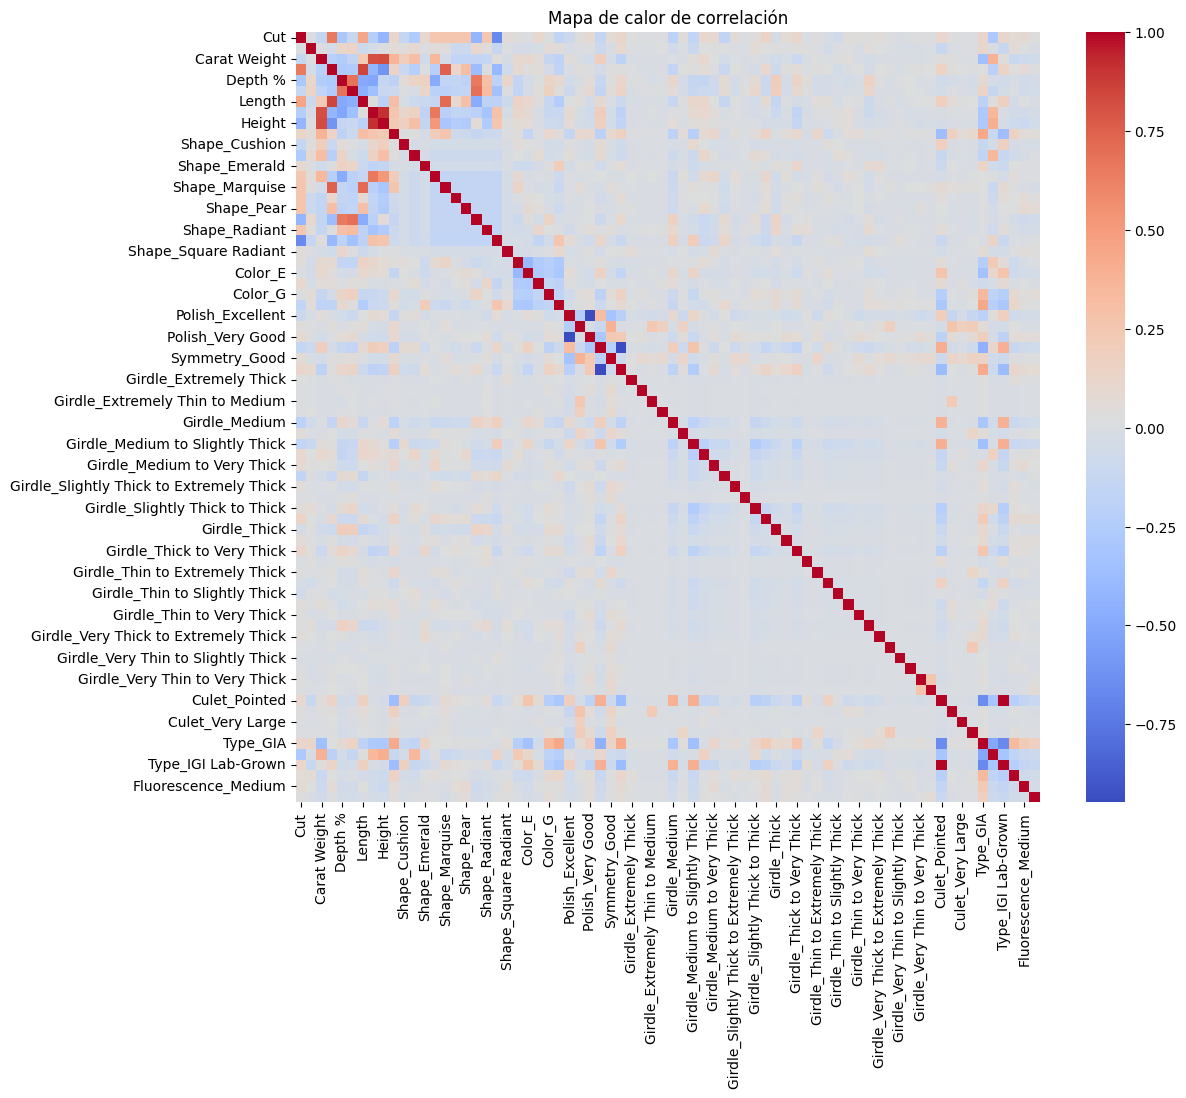

========================= Diagramas de caja entre variables categóricas y cuantitativas =========================


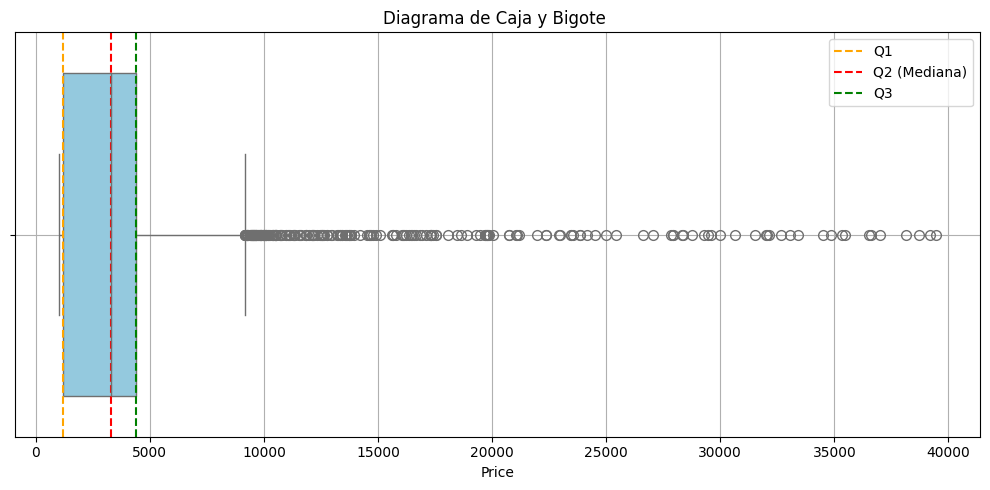

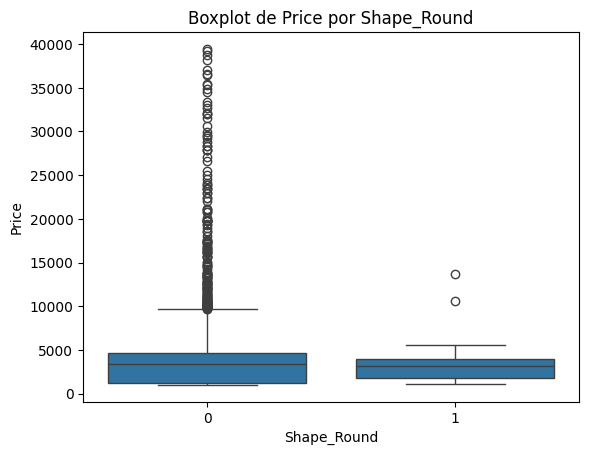

========================= Tablas de distribución de frecuencias =========================


,Intervalo,Marca de clase,Frecuencia,Frecuencia relativa,Frecuencia acumulada,Frecuencia relativa acumulada
0,"[1010.0, 3967.69)",2488.845,4182,0.6449,4182,0.6449
1,"[3967.69, 6925.38)",5446.535,1884,0.2905,6066,0.9354
2,"[6925.38, 9883.07)",8404.225,246,0.0379,6312,0.9733
3,"[9883.07, 12840.76)",11361.915,62,0.0096,6374,0.9829
4,"[12840.76, 15798.45)",14319.605,28,0.0043,6402,0.9872
5,"[15798.45, 18756.14)",17277.295,22,0.0034,6424,0.9906
6,"[18756.14, 21713.83)",20234.985,16,0.0025,6440,0.9931
7,"[21713.83, 24671.52)",23192.675,12,0.0019,6452,0.9950
8,"[24671.52, 27629.21)",26150.365,4,0.0006,6456,0.9956
9,"[27629.21, 30586.9)",29108.055,10,0.0015,6466,0.9971


========================= Histogramas =========================


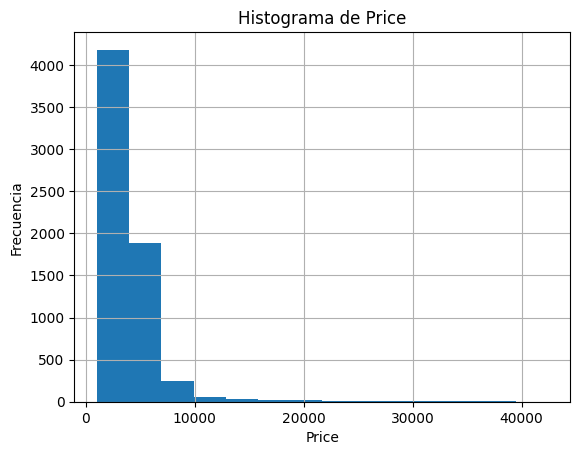

In [17]:
print("========================= Número de valores por cada variable =========================")
display(df_dummy.count())

print("========================= Medidas de tendencia central =========================")
print("Media")
display(df_dummy.mean())
print("Mediana")
display(df_dummy.median())
print("Moda")
display(df_dummy.mode())

print("========================= Medidas de dispersión =========================")
print("Varianza")
display(df_dummy.var())
print("Desviación estándar")
display(df_dummy.std())
print("Rango")
display(df_dummy.max() - df_dummy.min())
print("Coeficiente de variación (%)")
display((df_dummy.std() / df_dummy.mean()*100).round(2))

print("========================= Medidas de posición =========================")
print("Cuartiles")
display(df_dummy.quantile([0.25, 0.5, 0.75]))
Q1 = df_dep.quantile(0.25)
Q2 = df_dep.quantile(0.5)
Q3 = df_dep.quantile(0.75)

print("========================= Sesgo y curtosis =========================")
print("Sesgo")
display(df_dummy.skew())
print("Curtosis")
display(df_dummy.kurtosis())

print("========================= Medidas de dispersión =========================")


print("========================= Correlación entre pares de variables cuantitativas =========================")
display(df_dummy.corr())
plt.figure(figsize=(12, 10))
sns.heatmap(df_dummy.corr(), annot=False, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

print("========================= Diagramas de caja entre variables categóricas y cuantitativas =========================")
plt.figure(figsize=(10, 5))
sns.boxplot(x=x, color='skyblue', fliersize=7)
plt.axvline(Q1, color='orange', linestyle='--', label='Q1')
plt.axvline(Q2, color='red', linestyle='--', label='Q2 (Mediana)')
plt.axvline(Q3, color='green', linestyle='--', label='Q3')
plt.title('Diagrama de Caja y Bigote ')
plt.xlabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
sns.boxplot(x="Shape_Round", y="Price", data=df_dummy)
plt.title('Boxplot de Price por Shape_Round')
plt.show()

print("========================= Tablas de distribución de frecuencias =========================")
x = df_dep
n = len(x)
k = int(1 + 3.322 * np.log10(n))
rango = x.max() - x.min()
amplitud = round(rango / k, 2)
bins = np.arange(x.min(), x.max() + amplitud, amplitud)

# Asignar intervalos
x_cut = pd.cut(x, bins=bins, right=False)
tabla_freq = x_cut.value_counts().sort_index()
marca_clase = [(interval.left + interval.right) / 2 for interval in tabla_freq.index]
freq_abs = tabla_freq.values
freq_rel = np.round(freq_abs / n, 4)
freq_acum = np.cumsum(freq_abs)
freq_rel_acum = np.cumsum(freq_rel)

tabla_frecuencias = pd.DataFrame({
    "Intervalo": tabla_freq.index.astype(str),
    "Marca de clase": marca_clase,
    "Frecuencia": freq_abs,
    "Frecuencia relativa": freq_rel,
    "Frecuencia acumulada": freq_acum,
    "Frecuencia relativa acumulada": freq_rel_acum
})
display(tabla_frecuencias)

print("========================= Histogramas =========================")
df_dep.hist(bins=bins)
plt.title("Histograma de Price")
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.show()

